# Impacts of connected and autonomous vehicles on the performance of signalized networks:  A network fundamental diagram approach

In [17]:
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
import numpy as np
import matplotlib.pyplot as plt
import random
import math
import datetime
from collections import OrderedDict #order the dictionary
import copy #deep copy

np.set_printoptions(precision=3, suppress=True)#3 digit, no scientific notation
np.set_printoptions(threshold=np.inf) #no ellipses

delta_n = 1
L_int = 0; intersection = 0
delta = 4
reactime = 1
start = datetime.datetime.now()

# Notation list
|Variables | Definitions | Variables | Definitions |
| :----:| :----: | :----: | :----: |
| Length and position variables        |
| $L$ |  Road length | $l_n$ | Length of vehicle $n$ |
| $s_0$ | Minimum bumper to bumper distance | $\zeta$ | Jam spacing |
| $D$ | ASL implementation area length | $\gamma$ | Transmission range |
| $t_{RE}$  | reaction time  | $\tau$ | Time gap |
| $x_n(t)$ | TPosition of vehicle $n$ at time $t$ |
| Time variables |
| $t$ | Time | $\Delta t$ | Time step |
| $\tau$ | Time gap | $t_{re}$ | Reaction time |
| $B$ | Cycle length | $G$| Green interval |
| $Y$ | Yellow plus all-red interval | $R$  | Red interval |
| $\sigma$ | Simulation duration | $h$| Saturation headway  |
| $h_{n}^{'}$ | Headway between vehicle $n$ and $n+1$ | $t_{n}^{*}$  | Time when vehicle $n$ enters the ASL implementation area |
|  $\Phi_n(t)$ | Desired arrival time of vehicle $n$ at time $t$ | $T_n(N)$ | Period of vehicle $n$'s speed in stationary states when there are N vehicles in the system |
| $T_{sys}(N)$ | Period of system average speed in stationary states when there are N vehicles in the system  |
| Speed and acceleration variables       |
| $v_f$ |  Original speed limit (free-flow speed) | $w$ | Shock wave speed in congested traffic|
| $a_0$ | Bounded acceleration | $b$ | Bounded deceleration |
| $v_n(t)$ | Speed of vehicle $n$ at time $t$ | $a_n(t)$ | Acceleration of vehicle $n$ at time $t$ |
| $U_n(t)$  | ASL of vehicle $n$ at time $t$  | $\bar v_{ind,n}(m)$ | Average speed of vehicle $n$ in the $m_{th}$ cycle |
| $\bar v_{sys}(m)$ | System average speed in the $m_{th}$ cycle|
| Other variables |
| $\pi$ | $=\frac{G+Y}{T}$, phase ratio | $V_n$ | Fuel consumption of vehicle $n$ |
| $q_c$ | Capacity | $\bar{V_n}$ | The average fuel consumption of vehicle $n$ to move a unit distance |
| $J_t^n$ | Number of vehicles in front of vehicle $n$ at time $t$ |


# ASL algorithms


1. Vehicle speeds cannot exceed the original speed limit. The earliest time vehicle $n$ can enter the intersection can be calculated based on the original speed limit and the signal as follows:
$$
\varphi_n (t)=
\begin{cases}
H_n(t), &\frac{H_n(t)}{B}-\lfloor \frac{H_n(t)}{B} \rfloor \leq F_n(t)\ (2)\\ 
(\lfloor \frac{H_n(t)}{B} \rfloor + 1)B, &otherwise
\end{cases}
$$
$$
H_n(t) = t + \frac{L-x_n(t)}{v_f}, (3)
$$
where $L$ is road length, $v_f$ is the original speed limit and $x_n(t)$ is the position of vehicle $n$ at time $t$. $F_n(t)B$ is the time during which there will be no vehicle stops at the stop line. Note that unlike the effective green time, i.e. the amount of time that vehicles can departure at a rate of one vehicle every $h$ seconds, $F_n(t)B$ only focuses on whether vehicles can cross the stop line, regardless of the rate. Aggressive drivers will choose to cross the intersection at their first chance once they enter the intersection at phase, thus $F_n(t)B = \pi B$. Non-aggressive drivers will choose to stop at their first chance. At the time point when the signal changes to yellow from green, they will choose to stop once the distance to the intersection is enough for them to brake. We assume the reaction time is $t_{re}$, and the braking distance and the time they need for braking can be written as $t_{re}\times v_n(t)+\frac{v_n(t)^2}{2b_0}$ and $t_{re}+\frac{v_n(t)}{b_0}$ respectively. Thus, a non-aggressive driver is impossible to cross the stop line in one cycle after $G+t_{re}+\frac{v_n(t)}{b_0}$ and $F_n(t)B = G+t_{re}+\frac{v_n(t)}{b_0}$ for non-aggressive drivers, as follows: 
$$
F_n (t)=
\begin{cases}
\pi, & for\ aggressive\ drivers \ (4)\\
\frac{G+t_{re}+\frac{v_n(t)}{b_0}}{B}. &for\ non-aggressive\ drivers
\end{cases}
$$ (4)
2. The vehicle should obey the car-following rule. The ideal condition is that connected vehicles in the ASL implementation can enter the intersection at saturation headway ($h$) intervals. Meanwhile, if a vehicle is expected to enter the intersection at the end of one phase, the vehicle behind it can enter the intersection at the starting point of the next green interval. From this perspective, the earliest time vehicle $n$ can enter the intersection can be calculated as follows:
$$
\mathop{\eta_n^j (t)}\limits_{j\in[1,J_t^n]}=
\begin{cases}
\eta_n^{j-1}(t) + h, & \frac{\eta_n^{j-1}(t) + h}{B}-\lfloor \frac{\eta_n^{j-1}(t) + h}{B}\rfloor \leq F_n(t) \ (5)\\
(\lfloor \frac{\eta_n^{j-1}(t) + h}{B}\rfloor+1)B, &otherwise
\end{cases} 
$$ (5)
where $h$ is the saturation headway, $j$ increases from $1$ to $J_t^n$, and $\eta_n^{J_t^n}(t)$ is the final result we want to obtain. Note that if there are no vehicles in front of vehicle $n$ ($J_t^n=0$), then $\eta_n^0(t)=t$ if current signal is in phase, otherwise it is equal to $(\lfloor \frac{t}{B}\rfloor+1)B$. 
3.  Finally, we can calculate the advisory speed at the next time step. The time left for vehicle $n$ to reach the intersection is $max\{\eta_n^{J_t^n}(t),\varphi_n (t)\}-t$ and the distance it needs to cover is $L-x_n(t)$. Therefore, the ASL of vehicle $n$ can be calculated as follows:
$$
U_n(t+\Delta t) = \frac{L-x_n(n)}{max\{\eta_n^{J_t^n}(t),\varphi_n (t)\}-t}. \ (6)
$$
The the original speed limit will then be replaced by the ASL. There are two ways of implementing our ASL algorithm: 1. calculate it only when the vehicle enters the ASL implementation area; 2. keep updating it once the vehicle enters the ASL implementation area.

# input:
the vehicles and corresponding status in the ASL implementation area, assume there are $x$ vehicles in the ASL implementation area, then the input is a $x\times 7$ matrix. <br>
output: 
the dynamic ASL for those vehicles, the output should be a dictionary which contains $x$ keys and $x$ values.
matrix:
**0**.vehicle number, **1**.position, **2**.speed, **3**.acceleration, **4**.cumulative position, **5**.ASL, **6**.desired arrival time, **7**.indicate veriable (connected or non-connected) <br>
**veh_dic**: the number of the vehicle corresponding to its position <br>
**veh_D**: parameters of the vehicles in the ASL implementation area 

indicate variable

*   connected vehicle: 1;
*   non-connected vehicles: 0 
* ASL: 0
* extended ASL 1
* aggressive 1
* non-aggressive 0








In [18]:
def dynamic_asl(veh_D,leader_t,L_int,L,D,l_n,s_0,t,T,G,Y,R,delta_t,tau,v_f,a_0,b,a,n,model_id): #input: the vehicles in the ASL implementation area
    rho = l_n + s_0; veh_1 = 0; ASL_t = {}; phi_t = {} #to store the ASL and the desired arrival time
    h =  (v_f*delta_t+l_n+s_0)/v_f #(1.5*delta_t+(l_n+s_0)*delta_n/v_f); #2/delta_t #
    v_0 = v_f 
    global varphi_t; veh_dic = {}; leader_pos = {}; veh_agg = {}; veh_con = {}; veh_v = {};veh_exp = {} # veh_dic is to store the current position of the vehicles in the ASL implementation area
    for i in range(len(veh_D)): #vehicle number corresponds to the position, a dictionary that illustrate the position of each vehicle
        veh_dic[veh_D[i][0]] = veh_D[i][1]; leader_pos[veh_D[i][0]] = leader_t[int(veh_D[i][0])][1] #position 
        veh_agg[veh_D[i][0]] = veh_D[i][8]; veh_con[veh_D[i][0]] = veh_D[i][7]
        veh_v[veh_D[i][0]] = veh_D[i][2]; veh_exp[veh_D[i][0]] = veh_D[i][6] 
    #print("t",t,"vehicle dic",veh_con)
    veh_dic = sort_value(veh_dic, reverse=True)
    front_veh = front_vehicle(veh_dic,L) # for each vehicle, how many vehicles are in front of it
    if veh_dic != {}:
        for key in veh_dic: #if this vehicle is in the ASL implementation area
            if veh_con[key] == 1: #connected vehicle
                if veh_agg[key] == [1]: #aggressive
                    expected_arrival1 = t*delta_t if t*delta_t % (T*delta_t) <= (G+Y)*delta_t else t*delta_t - (t*delta_t % (T*delta_t)) + (T*delta_t); sigma = 0 #unit is delta_t
                    for i in range(front_veh[key]):  # Eq(5)
                        if (expected_arrival1 + h) % (T*delta_t) <= (G+Y)*delta_t - sigma:
                            expected_arrival1 += h #sec
                        elif (expected_arrival1 + h) % (T*delta_t) > (G+Y)*delta_t - sigma:
                            expected_arrival1 = expected_arrival1 + h - ((expected_arrival1 + h) % (T*delta_t)) + (T*delta_t)
                    expected_arrival2 = t*delta_t + ((L+L_int +0 -veh_dic[key])/v_0) #sec
                    if expected_arrival2 % (T*delta_t) > (G+Y)*delta_t-sigma:
                        expected_arrival2 = expected_arrival2 - (expected_arrival2 % (T*delta_t)) + (T*delta_t) #Eq (2)
                    phi_t[key] = max(expected_arrival1,expected_arrival2) 
                    ASL_t[key] = max(veh_v[key]-b*delta_t, min(v_f, (L+L_int +0 -veh_dic[key])/(phi_t[key]-t*(delta_t)) ) ) #Eq(6) , veh_v[key]-b*delta_t 
                if veh_agg[key] == [0]: #non-aggressive
                    expected_arrival1 = t*delta_t if t*delta_t % (T*delta_t) <= (G+Y)*delta_t else t*delta_t - (t*delta_t % (T*delta_t)) + (T*delta_t); #unit is sec
                    for i in range(front_veh[key]): # Eq(5)
                        if (expected_arrival1 + h) % (T*delta_t) <= G*delta_t + (reactime + (veh_v[key])/(b)):
                            expected_arrival1 += h
                        elif (expected_arrival1 + h) % (T*delta_t) > G*delta_t + (reactime + (veh_v[key])/(b)):
                            expected_arrival1 = expected_arrival1 + h - ((expected_arrival1 + h) % (T*delta_t)) + (T*delta_t)
                    expected_arrival2 = t*delta_t + ((L+L_int +0.5 -veh_dic[key])/v_0) #sec 
                    if expected_arrival2%(T*delta_t) > G*delta_t + (reactime + (veh_v[key]+0*delta_t)/(b)): #Eq (2)
                        expected_arrival2 = expected_arrival2 - (expected_arrival2 % (T*delta_t)) + (T*delta_t)
                    phi_t[key] = max(expected_arrival1,expected_arrival2) #eq(14)-eq(15)
                    ASL_t[key] = max( min(v_f, (L+L_int +0.5 -veh_dic[key])/(phi_t[key]-t*(delta_t))), veh_v[key]-b*delta_t) # Eq(6) 
        if t > 10*T and t < 2*T: print("new_timestep------------------------------------------------------------------------------------")
            #if veh_con[key] == 0 or veh_dic[key] == L: ASL_t[key] = v_f
            
    return veh_1, veh_dic, phi_t, ASL_t

In [19]:
def front_vehicle(veh_pos,L): #how many vehicles are in front of a specific vehicle
    front_veh = {}; 
    for key in veh_pos:
        veh_in_front = 0
        for value in veh_pos.values():
            #print("function front_vehicle","value",value,"veh_pos",veh_pos[key])
            if value > veh_pos[key] and value <= L:
                veh_in_front += 1
        front_veh[key] = veh_in_front
    return front_veh


def ASL_imp_area(veh_t,L,D):
    veh_D = []
    veh_id = np.argwhere(np.array(veh_t)[:,1] >= L-D) # the index of the vehicles that are in the ASL implementation area
    for i in range(len(veh_id)):
        veh_D.append(veh_t[veh_id[i,0]]) #the set of those vehicles
    return veh_D

# define whether a vehicle is connected
def random_pick(some_list, probabilities):
    x = random.uniform(0,1)
    cumulative_probability = 0
    for item, item_probability in zip(some_list, probabilities):
        cumulative_probability += item_probability
        if x < cumulative_probability:break
    return item

#reorder the dictionary according to value (the position of vehicle, large to small)
def sort_value(old_dict, reverse=True):
    # reorder the dic according to value
    items = sorted(old_dict.items(), key=lambda obj: obj[1], reverse=True)
    # create a new list
    new_dict = OrderedDict()
    for item in items:
        # item[0] store the value of "key"
        new_dict[item[0]] = old_dict[item[0]]
    return new_dict

# Driving behavior model

## krauss
$$
v_n(t+\Delta t)=\max\{ 0,v_{des,n}(t+\Delta t)-\epsilon \} (9)
$$
$$
v_{des,n}(t+\Delta t)=\min \{ v_f, v_n(t)+\Delta ta_0,v_{safe,n}(t+\Delta t) \}(10)
$$
$$
v_{safe,n}(t+\Delta t)= v_{n-1}(t)+\frac{x_{n-1}(t)-x_n(t)-l_{n-1}-v_{n-1}t_{re}}{\frac{v_{n-1}(t)+v_n(t)}{2b}+t_{re}}, (11)
$$


0: id <br> 1:position <br> 2:speed <br> 3:aceleration <br> 4:cum position <br>
5: ASL <br> 6: time to intersection <br> 7: whether connected <br> 8: aggressiveness <br> 9: ASL id




In [20]:
def krauss(veh_t,leader_t,L_int,L,D,l_n,s_0,t,T,G,Y,R,delta_t,tau,v_f,a_0,b,n,delta_n,a,model_id,asl_id):
    model_id = 3; rho = l_n + s_0; h = 2/delta_t #tau+(l_n+s_0)/v_f; #calculate parameters
    veh_t1 = np.zeros((n,10)); veh_t1[:,0] = veh_t[:,0]; veh_t1[:,7] = veh_t[:,7] ;veh_t1[:,8] = veh_t[:,8]; veh_t1[:,9] = veh_t[:,9]# initialize the matrix at (t+delta_t)
    #veh_D = ASL_imp_area(veh_t,L,D); 
    veh_D = ASL_imp_area(veh_t,L,D)
    veh_1, veh_dic, phi_t, ASL_t = dynamic_asl(veh_D,leader_t,L_int,L,D,l_n,s_0,t,T,G,Y,R,delta_t,tau,v_f,a_0,b,a,n,model_id); # get the dynamic ASL for the vehicles in the ASL implementation area
    for i in range(n):                           
        if asl_id == 1 or veh_t[i,7] == 0: #if dynamic ASL or non connected vehicle                         
            veh_t1[i,5] = v_f if i not in ASL_t else ASL_t[i]; veh_t1[i,6] = t if i not in phi_t else phi_t[i] #ASL and desired arrival time of the next time point
        elif asl_id == 0: #static ASL
            if veh_t[i,1] >= L-D and veh_t[i,1]-veh_t[i,2]*delta_t <= L-D:
                veh_t1[i,5] = ASL_t[i]; veh_t1[i,6] = phi_t[i]
            elif veh_t[i,1] >= L-D and veh_t[i,1]-veh_t[i,2]*delta_t >= L-D:
                veh_t1[i,5] = veh_t[i,5]; veh_t1[i,6] = veh_t[i,6]
            else:
                veh_t1[i,5] = v_f; veh_t1[i,6] = t
    v_safe = leader_t[:,2] + (leader_t[:,1]-veh_t[:,1]-rho-leader_t[:,2]*delta_t)/((leader_t[:,2]+veh_t[:,2])/(2*b)+delta_t) #Eq(11)
    veh_t1[:,2] =  np.maximum( np.array([0]*len(veh_t))[:], np.minimum(veh_t1[:,5], np.minimum(veh_t[:,2]+a_0*delta_t, v_safe ))) #Eq(9) speed
    veh_t1[:,1] = (veh_t[:,1] + veh_t1[:,2] * delta_t) % L #position in ring road 0.5*(veh_t[:,2]+veh_t1[:,2])
    veh_t1[:,4] = (veh_t[:,4] + veh_t1[:,2] * delta_t) #cum position
    veh_t1[:,3] = (veh_t1[:,2] - veh_t[:,2])/delta_t #acceleration
    
    if veh_t[a,2] <= 0.05 and t%T <= reactime-0.05: #first vehicle is stopping
        t_re = reactime
        veh_t1[a,1] = veh_t[a,1] #Eq(24) position
        veh_t1[a,2] = veh_t1[a,2]; veh_t1[a,3] = veh_t1[a,3]; veh_t1[a,4] = veh_t1[a,4]
    
    #print("time",t,"position",veh_t[a,1],"leader",leader_t[a,1],"speed",veh_t[a,2],"next_v",veh_t1[a,2],"acceleration",veh_t[a,3],"ASL",veh_t1[a,5],"s_desire",s_desire,"s_actual",s_actual)
    if round(veh_t1[a,1],3) == 0: 
        veh_t1[a,1] = L;
    
    return veh_t1

## Decision process
When the signal changes to yellow from green, a vehicle can safely stop before the stop line if it satisfies 27(a), otherwise if it satisfies 27(b), it can go through the intersection before the signal turns to red.
$$
x_{int} - x_n(t) \geq t_{RE}\times v_n(t)+\frac{v_n(t)^2}{2b}, (13)
$$
$$
X_{int} + L_{int} - x_n(t) < v_n(t)\times Y, (14)
$$


In [21]:
def decision_process(veh_t,L_int,L,D,l_n,s_0,t,T,G,Y,R,delta_t,tau,v_f,a_0,b,n,delta_n,a,model_id,asl_id): #define the leader based on vehicle's current state, should be calculated at each time step
    time = t % T; rho = l_n + s_0; leader_t = np.zeros((n,10))    
    for i in range(n):    
        if time <= G or i != a: # gerrn interval or not the first vehicle
            leader_t[i] = veh_t[i-1]
            if leader_t[i,1] <= veh_t[i,1]:
                leader_t[i,1] += L; leader_t[i,4] += L;
        if time > G and i == a:        
            item1 = veh_t[(i-1),1]-veh_t[i,1]; item2 = L + rho - veh_t[i,1] #item1: distance between fron vehicle and follower, item2: distance between stop bar and follower
            if item1 <= item2 and item1 > 0: leader_t[i] = veh_t[i-1]
            if item1 <= 0 and veh_t[(i-1),1] >= rho: leader_t[i] = [abs((i-1)%n), L+rho, 0, 0, ((veh_t[i,4]//L)+1)*L, 0, veh_t[i,6], veh_t[i,7],veh_t[i,8],veh_t[i,9]]
            if veh_t[(i-1),1] < rho : leader_t[i] = [abs((i-1)%n), L+veh_t[i-1,1], 0, 0, ((veh_t[i,4]//L)+1)*L, 0, veh_t[i-1,6], veh_t[i-1,7],veh_t[i-1,8],veh_t[i-1,9]] # cannot reach the stop bar because of the front vehicle
            if veh_t[i,1] <= 0.0001: leader_t[i] = [abs((i-1)%n), rho*delta_n, 0, 0, ((veh_t[i,4]//L)+1)*L, 0, veh_t[i,6], veh_t[i,7],veh_t[i,8],veh_t[i,9]]
    return leader_t

def pos_switch(veh_t,rho,n,t,G,Y,R,T,L):
    veh_t1 = copy.deepcopy(veh_t)
    for i in range(n):
        if veh_t[i,1] <= rho and t%T >= (G):
            veh_t1[i,1] = L+veh_t[i,1]

    return veh_t1



## Vehicle update

In [22]:
def vehicle_update(L_int,L,D,l_n,s_0,t_sim,T,G,Y,R,delta_t,tau,v_f,a_0,b,n,delta_n,model_id,con,agg,asl_id): 
    rho = (l_n + s_0)*delta_n; h = 2/delta_t; num_t = int(t_sim/delta_t); v_0 = 0 #((tau * delta_n) + rho*delta_n/v_f) / delta_t
    veh_t = np.zeros((n,num_t,10)); veh_t1 = np.zeros((n,num_t,10)); distance_non = np.zeros((num_t,n)); distance_agg = np.zeros((num_t,n))
    time_tc = np.zeros((num_t,1)); a=np.zeros((num_t,1));a_non=np.zeros((num_t,1));a_agg=np.zeros((num_t,1))# initialize the vehicle state
    for i in range(n):    
        vehicle_con = random_pick([0,1],[1-con,con]); aggressive = random_pick([0,1],[1-agg,agg]) #initialize whether a vehicle is a connected vehicle,connectivity is the percentage of the connected vehicles
        veh_t[i][0] = [i, L-(L/n)*i, v_0, a_0, L-(L/n)*i, v_f, 0, vehicle_con, aggressive, asl_id];#n, m, m/sec, m/sec^2, m, m/s, timestep, 0|1  300+(n-i)*3*rho L-(L/n)*i   
    for t in range(num_t-1): #update vehicles' behaviors according to the signal phase
        time = t % T; 
        if veh_t[i][t,8] == 0: #non aggressive
            if time == G+1:
                for i in range(n): #+a_0*delta_t veh_t[i,t,2]+a_0*delta_t
                    distance_non[t,i] = L + L_int - veh_t[i,t,1] - reactime*veh_t[i,t,2] - ((veh_t[i,t,2]+a_0)**2)/(2*b)
                distance_non[t,:] = [L if x <= 0 else x for x in distance_non[t,:]]            
                a_non[t] = int(np.argwhere(distance_non[t,:] == np.min(distance_non[t,:]))[0,0])
            else:
                a_non[t] = a[t-1]
        elif veh_t[i][t,8] == 1: #aggressive
            if time >= G+1 and time <= G+Y:
                for i in range(n): #+a_0*delta_t veh_t[i,t,2]+a_0*delta_t
                    distance_agg[t,i] = L + L_int - veh_t[i,t,1] - (veh_t[i,t,2]) * (Y-(time-G)) * delta_t         
                distance_agg[t,:] = [L if x <= 0 else x for x in distance_agg[t,:]]            
                a_agg[t] = int(np.argwhere(distance_agg[t,:] == np.min(distance_agg[t,:]))[0,0])#judge the first vehicle which can not pass the intersection    
            else:
                a_agg[t] = a[t-1]    
        #print("t", t, "a",a_non[t],"distance",distance[t,:])
        a[t] = a_agg[t] if int(a_non[t])==0 else a_non[t] #veh_t[int(a_non[t]),t,1] < veh_t[int(a_non[t]),t,1]
        leader_t = decision_process(veh_t[:,t,:],L_int,L,D,l_n,s_0,t,T,G,Y,R,delta_t,tau,v_f,a_0,b,n,delta_n,a[t],model_id,asl_id); follower_current_state = veh_t[:,t,:]; #vehicles'current state and corresponding leaders
        veh_t[:,t+1,:] = krauss(follower_current_state,leader_t,L_int,L,D,l_n,s_0,t,T,G,Y,R,delta_t,tau,v_f,a_0,b,n,delta_n,int(a[t]),model_id,asl_id)
        #print("t", t,"a",a[t], "leader_x_t", leader_t[:,1],"fo_x_t",follower_current_state[:,1],"fo_x_t1",veh_t[:,t+1,1],"fo_v_t1",veh_t[:,t+1,2]) #"asl", follower_current_state[:,5]
    return veh_t

# individual sample

In [23]:
tau = 1.5; delta_t = 1.5; t_sim = 7200; num_t = int(t_sim/delta_t)
R = int(30/delta_t); G = int(24/delta_t); Y = int(6/delta_t); T = G + Y + R
v_f = 12; a_0 = 1.5; b = 3;
l_n = 5; s_0 = 2; rho = l_n + s_0; L = T * v_f * delta_t;  w = rho/tau; D = 100 #m T * v_f * delta_t
delta_n = 1
n1 = 50; n2 = 51
non_connected = 0; all_connected = 1; aggressive = 1; asl_id = 1
veh_update = vehicle_update(L_int,L,D,l_n,s_0,t_sim,T,G,Y,R,delta_t,tau,v_f,a_0,b,n2,delta_n,3,all_connected,aggressive,asl_id)
veh_update_non = vehicle_update(L_int,L,D,l_n,s_0,t_sim,T,G,Y,R,delta_t,tau,v_f,a_0,b,n2,delta_n,3,non_connected,aggressive,asl_id)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:27: RuntimeWarning: invalid value encountered in double_scalars


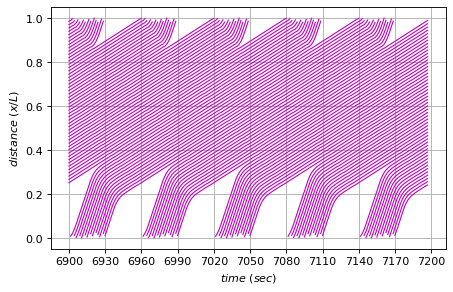

In [24]:
fig = plt.figure(figsize=(14,4),num = 1,dpi = 80)

p = 5 #int(num_t/T)
a = 1
time1_1 = np.zeros([num_t,1])
for i in range(num_t):
    time1_1[i] = i*delta_t
m4 = int(num_t)
m1 = int(num_t-p*T)  

ax2 = fig.add_subplot(1,2,1)
#ax2.set_title("Trajectories,penetrate rate: %x" %all_connected)
ax2.set_xlabel("$time \ (sec)$")
ax2.set_ylabel("$distance \ (x/L)$")
#plt.xlim(0,p+0.2)
plt.xticks(np.arange(0,time1_1[-1]+5,30))
#plt.yticks(np.arange(0,2,1))
for i in range(0,int(n2/delta_n),int(1/delta_n)):
    t1 = m1
    for t in range(t1,m4):
        if veh_update[i][t-1,1] <= veh_update[i][t,1] and t != m4-1:
            continue
        else:
            #print("t1",t1*time_step,"loop_over time",t*time_step,"vehicle",i)
            ax2.plot(time1_1[t1:t],veh_update[i][t1:t,1]/L,color = 'm',linewidth = 1)
            t1 = t
            continue
ax2.grid()

# Periodicity and NFD

## Individual periods and system periods
The average speed of vehicle $n$ in the $m_{th}$ cycle length is the distance it can cover in this cycle length over the time.
$$
\bar v_{ind,n}(m) = \frac{x_n((m+1)B)-x_n(mB)}{B}, (15)
$$
where $x_n((m+1)B)-x_n(mB)$ means the distance vehicle $n$ can cover in the $m$th cycle length. The system average speed in the $m$th cycle length is the sum of all the individual average speed in such cycle length over the number of vehicles.
$$
\bar v_{sys}(m) = \frac{\sum_{n=0}^{n=N}\bar v_{ind,n}(m)}{N}. (16)
$$
We assume there are $M$ cycles during the whole simulation duration. We use $m$ to represent the number which can be shifted along the cycle numbers and $m$ is shifted forward from the last cycle length. We shift $m$ along up to $50$ cycle numbers for calculating periods. If there exists some integers $i$ that can satisfy the following equations for any $m$: 
$$
\max \limits_{m = M-50,M-49,…,M-1,M}|\bar v_{ind,n}(m)-\bar v_{ind,n}(m-i)| < \epsilon, (17)
$$
$$
\max \limits_{m = M-50,M-49,…,M-1,M}|\bar v_{sys}(m)-\bar v_{sys}(m-i)| < \epsilon, (18)
$$

where $\epsilon$ is a small enough number. We consider that those integers are the periods of individual speed or system average speed for corresponding cycle length $B$ and number of vehicles $N$. The final $i$ is the smallest number among those integers.

In [25]:
def period_individual(n,delta_n,D,connectivity,G,Y,R,T,vehicle_state,model_id,num_t):
    #average_speed1 = np.zeros([num_timestep,1])
    P = 50
    I = 50
    convergence1 = np.zeros([I,P]); convergence2 = np.zeros([I,P])
    minus = np.zeros([I,P]) #speed gap, if all < 10^-5, it is the period

    num_cycle = int(num_t/T); individual_average = []; period = np.zeros([n,1])                
    for j in range(n):
        individual_average.append(np.zeros([num_cycle,1]))
        for x in range(num_cycle):#the average speed of the vehicle in each signal circle eq(15)
            individual_average[j][x] = sum(vehicle_state[j][int(T*x) :int(T*(x+1))-1,1])/T #the length a vehicle run in a cycle/cycle_length #Eq(15)
        total_period = []   
        for i in range(1,I+1):
            for k in range(num_cycle-P,num_cycle):
                convergence1[i-1,k+(P)-num_cycle] = individual_average[j][k]
                convergence2[i-1,k+(P)-num_cycle]= individual_average[j][k-i]
                minus[i-1,k+(P)-num_cycle] = abs(convergence1[i-1,k+(P)-num_cycle]-convergence2[i-1,k+(P)-num_cycle])  #Eq(17)
            if all(x < 0.00001 for x in minus[i-1]):
                total_period.append(i)
            if len(total_period) == 0 and i == I:
                total_period.append(I)        
        period[j] = min(total_period)
    return period,individual_average

In [26]:
def period_system(n,delta_n,D,connectivity,G,Y,R,T,vehicle_state,model_id,num_t):
    P = 50; I = 50
    convergence1 = np.zeros([I,P]); convergence2 = np.zeros([I,P])
    minus = np.zeros([I,P]) #speed gap, if all < 10^-5, it is the period
    total_period = []; individual_average = []
    num_cycle = int(num_t/T); average_speed1 = np.zeros([num_cycle,1]); #print("num_cycle",num_cycle,"t",num_t,"T",T)              
    for x in range(num_cycle):#the average speed of the vehicle in each signal circle
        system_speed1 = 0; individual_average.append(np.zeros([n,1]))
        for i in range(n):
            individual_average[x][i] = sum(vehicle_state[i][int(T*(x-1)):int(T*(x)),2])/T #the length a vehicle run in a cycle/cycle_length            
            system_speed1 = system_speed1 + individual_average[x][i,0]#the length of all the vehicles run in this cycle
        average_speed1[x] = (system_speed1/(n)) #Eq(16) 
    for i in range(1,I+1): #calculate the period of the system average speed at each density value 
        for k in range(num_cycle-P,num_cycle):
            convergence1[i-1,k+(P)-num_cycle] = average_speed1[k,0]
            convergence2[i-1,k+(P)-num_cycle]= average_speed1[k-i,0]
            minus[i-1,k+(P)-num_cycle] = abs(convergence1[i-1,k+(P)-num_cycle]-convergence2[i-1,k+(P)-num_cycle]) #Eq(18)
        if all(x < 0.00001 for x in minus[i-1]):
            total_period.append(i)
        if len(total_period) == 0 and i == I:
            total_period.append(I)
    #print("average1", average_speed1)        
    period = min(total_period)
    return period,average_speed1

## Calculate NFD

We assume the density of the system is $k$; the system has reached the stationary state and $\bar v(k)$ is the system average speed in one period. Flow-rate can be calculated through:
$$
\bar q(k)=k \bar v(k), (21)
$$


In [27]:
def nfd_calc(n1,n2,delta_n,L_int,L,D,l_n,connectivity,G,Y,R,T,tau,delta_t,t_sim,s_0,v_f,a_0,b,model_id,agg,asl_id): 
    rho = l_n + s_0; L = v_f*T*delta_t; w = rho/(tau); num_t = int(t_sim/delta_t); flow_rate = []; density = []
    num_signal = int(num_t/T)
    w = rho/(tau); capacity = v_f * w * (1/rho) / (v_f + w)
    global vehicle_state
    for n in range(n1,n2): # a specific vehicle number represents a corresponding density
        vehicle_state = vehicle_update(L_int,L,D,l_n,s_0,t_sim,T,G,Y,R,delta_t,tau,v_f,a_0,b,n,delta_n,model_id,connectivity,agg,asl_id)
        period,average = period_system(n,delta_n,D,connectivity,G,Y,R,T,vehicle_state,model_id,num_t) #period correspongding to that density
        density.append((n*delta_n/(L+L_int))/(1/rho))
        system_average = sum(average[num_signal-int(period):num_signal,0])/period
        flow_rate.append(((n*delta_n/(L+L_int))*system_average)/capacity) #Eq(21)
        print("car_number",n*delta_n,"density =",density[-1],"flow rate = ",flow_rate[-1],"connectivity =",connectivity,"ASL",asl_id,'period',period,"speed",system_average,"D",D)
    return vehicle_state,flow_rate,density,period

In [ ]:
tau = 1.5; delta_t = 1.5; t_sim = 7200; num_t = int(t_sim/delta_t)
R = int(30/delta_t); G = int(24/delta_t); Y = int(6/delta_t); T = G + Y + R
v_f = 12; a_0 = 1.5; b = 3;
l_n = 5; s_0 = 2; rho = l_n + s_0; L = T * v_f * delta_t;  w = rho/tau; D = 300 #m
delta_n = 1
n1 = 2; n2 = 102
non_connected = 0; all_connected = 1; aggressive = 1; asl_id_dy = 1; asl_id_sa = 0
np.set_printoptions(precision=3, suppress=True)#3 digit, no scientific notation
np.set_printoptions(threshold=np.inf) #no ellipses


import datetime
start = datetime.datetime.now()
vehicle_banewell_dy,flow_banewell_dy,density_banewell_dy,period_banewell_dy = nfd_calc(n1,n2,delta_n,L_int,L,D,l_n,all_connected,G,Y,R,T,tau,delta_t,t_sim,s_0,v_f,a_0,b,3,aggressive,asl_id_dy)
vehicle_banewell_sa,flow_banewell_sa,density_banewell_sa,period_banewell_sa = nfd_calc(n1,n2,delta_n,L_int,L,D,l_n,all_connected,G,Y,R,T,tau,delta_t,t_sim,s_0,v_f,a_0,b,3,aggressive,asl_id_sa)
vehicle_banewell_non,flow_banewell_non,density_banewell_non,period_banewell_non = nfd_calc(n1,n2,delta_n,L_int,L,D,l_n,non_connected,G,Y,R,T,tau,delta_t,t_sim,s_0,v_f,a_0,b,3,aggressive,asl_id_dy)
end = datetime.datetime.now()
print("time",end-start)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:27: RuntimeWarning: invalid value encountered in double_scalars


car_number 2 density = 0.019444444444444445 flow rate =  0.06944444444444445 connectivity = 1 ASL 1 period 1 speed 12.0 D 300
car_number 3 density = 0.029166666666666667 flow rate =  0.10416666666666667 connectivity = 1 ASL 1 period 1 speed 12.0 D 300
car_number 4 density = 0.03888888888888889 flow rate =  0.1388888888888889 connectivity = 1 ASL 1 period 1 speed 12.0 D 300
car_number 5 density = 0.04861111111111111 flow rate =  0.1736111111111111 connectivity = 1 ASL 1 period 1 speed 12.0 D 300
car_number 6 density = 0.058333333333333334 flow rate =  0.20833333333333334 connectivity = 1 ASL 1 period 1 speed 12.0 D 300
car_number 7 density = 0.06805555555555556 flow rate =  0.24305555555555558 connectivity = 1 ASL 1 period 1 speed 12.0 D 300
car_number 8 density = 0.07777777777777778 flow rate =  0.2777777777777778 connectivity = 1 ASL 1 period 1 speed 12.0 D 300
car_number 9 density = 0.08750000000000001 flow rate =  0.31250000000000006 connectivity = 1 ASL 1 period 1 speed 12.0 D 300


In [ ]:
# when there is no signal
R = int(0/delta_t); G = int(60/delta_t); Y = int(0/delta_t); T = G + Y + R
vehicle_banewell_free,flow_banewell_free,density_banewell_free,period_banewell_free = nfd_calc(n1,n2,delta_n,L_int,L,D,l_n,non_connected,G,Y,R,T,tau,delta_t,t_sim,s_0,v_f,a_0,b,3,aggressive,asl_id_dy)

car_number 2 density = 0.019444444444444445 flow rate =  0.06944444444444445 connectivity = 0 ASL 1 period 1 speed 12.0 D 300
car_number 3 density = 0.029166666666666667 flow rate =  0.10416666666666667 connectivity = 0 ASL 1 period 1 speed 12.0 D 300
car_number 4 density = 0.03888888888888889 flow rate =  0.1388888888888889 connectivity = 0 ASL 1 period 1 speed 12.0 D 300
car_number 5 density = 0.04861111111111111 flow rate =  0.1736111111111111 connectivity = 0 ASL 1 period 1 speed 12.0 D 300
car_number 6 density = 0.058333333333333334 flow rate =  0.20833333333333334 connectivity = 0 ASL 1 period 1 speed 12.0 D 300
car_number 7 density = 0.06805555555555556 flow rate =  0.24305555555555558 connectivity = 0 ASL 1 period 1 speed 12.0 D 300
car_number 8 density = 0.07777777777777778 flow rate =  0.2777777777777778 connectivity = 0 ASL 1 period 1 speed 12.0 D 300
car_number 9 density = 0.08750000000000001 flow rate =  0.31250000000000006 connectivity = 0 ASL 1 period 1 speed 12.0 D 300


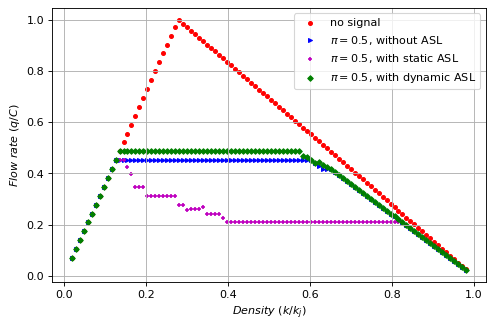

In [ ]:
fig = plt.figure(figsize=(7,10),num = 1,dpi = 80)

ax2 = fig.add_subplot(2,1,1)
#ax2.set_title("Trajectories,penetrate rate: %x" %all_connected)
ax2.set_xlabel("$Density \ (k/k_j)$")
ax2.set_ylabel("$Flow\ rate \ (q/C)$")
#plt.xlim(0,p+0.2)
#plt.xticks(np.arange(0,30000,30))
ax2.scatter(density_banewell_free,flow_banewell_free, marker = 'o', color = 'red', s = 12, label = 'no signal')
ax2.scatter(density_banewell_non,flow_banewell_non, marker = '>', color = 'b', s = 12, label = '$\pi = 0.5$, without ASL')
ax2.scatter(density_banewell_sa,flow_banewell_sa, marker = '+', color = 'm', s = 12, label = '$\pi = 0.5$, with static ASL')
ax2.scatter(density_banewell_dy,flow_banewell_dy, marker = 'D', color = 'g', s = 12, label = '$\pi = 0.5$, with dynamic ASL')
ax2.grid()
ax2.legend()

# Fuel consumption
The model has the following form:
$$
MOE_e(t,n)=
\begin{cases}
e^{\sum_{i=0}^3\sum_{j=0}^3 L_{i,j}^e\times v_n(t)^i \times a_n(t)^j}, &if\ a_n(t)\geq 0\\
e^{\sum_{i=0}^3\sum_{j=0}^3 F_{i,j}^e\times v_n(t)^i \times a_n(t)^j}, &if\ a_n(t) < 0
\end{cases} (21)
$$
where $MOE_e(t,n)$ is instantaneous fuel consumption ($l/s$) of vehicle $n$ at time $t$, $L_{i,j}^e$ and $F_{i,j}^e$ are regression model coefficients for MOE `$e$' at speed power `$i$' and acceleration power `$j$', $v_n(t)$ is instantaneous vehicle speed $(km/h)$, and $a_n(t)$ is instantaneous vehicle acceleration ($km/h/s$). <br>
As mentioned above, all the vehicles have the same individual periods and cover the same distance during one individual period in stationary states. The speed profiles of any two vehicles in one individual period can coincide with each other. Therefore, we can use average fuel consumption of one vehicle (the first vehicle) to move one unit distance in one individual period to represent the fuel consumption level. Sometimes periods of individuals can be very large. Considering the computation cost, we choose 50 cycle lengths as the upper boundary of individual periods in this study. Because $50$ cycle lengths is a long enough time which only results in small and acceptable error. It means that in this study, if individual periods are less than 50 cycle lengths, we use values in one individual period to calculate the average fuel consumption. Else if periods are larger than 50 cycle lengths, we calculate the average fuel consumption during these 50 cycle lengths.<br>
The total fuel consumption  of the first vehicle in one period is the sum of the instantaneous fuel consumption.
$$
V_1 = \sum_{t_{step}=\frac{\sigma-z}{\Delta t}}^{t_{step}=\frac{\sigma}{\Delta t}}MOE_e(t_{step} \Delta t,1)\Delta t, (22)
$$
The corresponding distance the vehicle has covered:
$$
d_1 = x(\sigma)-x_1(\sigma-z), (23)
$$
$$
z=
\begin{cases}
T_1(N)B, &if\ T_1(N) \leq 50\\
50B, &if\ T_1(N) > 50
\end{cases} 
$$
where $\sigma$ is the simulation duration, $T_1(N)$ is the individual period of vehicle $1$ (its unit is cycle length $B$), $N$ is the total number of vehicles in the system (it can represent congestion levels), $\Delta t$ is the time-step size, $t_{step}$ is time in the unit of time step-size. In order to move a certain distance $d(1)$, the fuel we need is $V(1)$. Thus the quotient of the two represents the fuel required for a car to travel per unit distance.
$$
\bar V_1 = \frac{V_1}{d_1} (36)
$$







In [28]:
def fuel_consumption(n1,n2,delta_n,L,D,connectivity,G,Y,R,T,tau,t_sim,delta_t,l_n,s_0,v_f,a_0,b,model_id,agg,asl_id):
#(n1,n2,loop_start,connectivity,green,cycle_length,yellow,all_red,time_gap,time_step,vehicle_length,s0,freeflow_speed,bounded_acc,bounded_dec,agg,asl_id,model_id,num_timestep):
    rho = l_n + s_0; w = rho/(tau); num_t = int(t_sim/delta_t);
    fuel = []; density = []; p1 = 3.6 #m/s to km/h; k = 2 #gap
    for n in range(n1,n2,1):
        i = n - 1; density.append((n*delta_n/L)/(1/rho)); final_fuel = 0; total_fuel = 0
        vehicle_state = vehicle_update(L_int,L,D,l_n,s_0,t_sim,T,G,Y,R,delta_t,tau,v_f,a_0,b,n,delta_n,model_id,connectivity,agg,asl_id)
        period,individual_average = period_individual(n,delta_n,D,connectivity,G,Y,R,T,vehicle_state,model_id,num_t) #individual period correspongding to that density            
        for t in range(int(num_t-1 - period[i] * T), num_t-1):#total fuel consumption for one vehicle
            if vehicle_state[i][t,3] >= 0:   
                fuel_comsume_sec = math.exp( -7.73452 + 0.22946 * vehicle_state[i][t,3]*p1 - 0.00561 * (vehicle_state[i][t,3]*p1)**2 + 0.000097730 * (vehicle_state[i][t,3]*p1)**3\
                                + 0.02799*vehicle_state[i][t,2]*p1 + 0.0068*(vehicle_state[i][t,2]*p1)*vehicle_state[i][t,3]*p1 - 0.00077221*(vehicle_state[i][t,2]*p1)*(vehicle_state[i][t,3]*p1)**2 + 0.00000838*(vehicle_state[i][t,2]*p1)*(vehicle_state[i][t+1,3]*p1)**3\
                                - 0.0002228*(vehicle_state[i][t,2]*p1)**2 - 0.00004402*(vehicle_state[i][t,2]*p1)**2*vehicle_state[i][t,3]*p1 + 7.9*10**(-7)*(vehicle_state[i][t,2]*p1)**2*(vehicle_state[i][t+1,3]*p1)**2 + 8.17*(10)**(-7)*(vehicle_state[i][t,2]*p1)**2*(vehicle_state[i][t+1,3]*p1)**3\
                                +1.09*(10)**(-6)*(vehicle_state[i][t,2]*p1)**3 + 4.8*(10)**(-8)*(vehicle_state[i][t,2]*p1)**3*vehicle_state[i][t,3]*p1 + 3.27*10**(-8)*(vehicle_state[i][t,2]*p1)**3*(vehicle_state[i][t,3]*p1)**2 + (-7.79)*10**(-9)*(vehicle_state[i][t,2]*p1)**3*(vehicle_state[i][t,3]*p1)**3)

            if vehicle_state[i][t,3] < 0:
                fuel_comsume_sec = math.exp( -7.73452 - 0.01799 * vehicle_state[i][t,3]*p1 - 0.00427 * (vehicle_state[i][t,3]*p1)**2 + 0.000188290 * (vehicle_state[i][t,3]*p1)**3\
                                +0.02804*vehicle_state[i][t,2]*p1 + 0.00772*(vehicle_state[i][t,2]*p1)*vehicle_state[i][t,3]*p1 + 0.00083744*(vehicle_state[i][t,2]*p1)*(vehicle_state[i][t,3]*p1)**2 - 0.00003387*(vehicle_state[i][t,2]*p1)*(vehicle_state[i][t,3]*p1)**3\
                                - 0.00021988*(vehicle_state[i][t,2]*p1)**2 - 0.00005219*(vehicle_state[i][t,2]*p1)**2*vehicle_state[i][t,3]*p1 - 7.44*10**(-6)*(vehicle_state[i][t,2]*p1)**2*(vehicle_state[i][t,3]*p1)**2 + 2.77*(10)**(-7)*(vehicle_state[i][t,2]*p1)**2*(vehicle_state[i][t,3]*p1)**3\
                                +1.08*(10)**(-6)*(vehicle_state[i][t,2]*p1)**3 + 2.47*(10)**(-7)*(vehicle_state[i][t,2]*p1)**3*vehicle_state[i][t,3]*p1 + 4.87*10**(-8)*(vehicle_state[i][t,2]*p1)**3*(vehicle_state[i][t,3]*p1)**2 + (3.79)*10**(-10)*(vehicle_state[i][t,2]*p1)**3*(vehicle_state[i][t,3]*p1)**3)
            total_fuel += delta_t * fuel_comsume_sec #Eq(36)       
        car_distance = sum(vehicle_state[i][int(num_t-1 - period[i]*T):int(num_t-1),2])*delta_t #m calculate the distance it has run
        fuel_per_m = total_fuel/car_distance; fuel.append(fuel_per_m)  #fuel consumption per meter for one car        
        print("car_number",n*delta_n,"density",(n*delta_n/L)/(1/rho),"final_fuel",fuel[-1],"period",period[i],"MPR",connectivity,"ASL",asl_id, "ASL area", D)
    return density,fuel,vehicle_state,individual_average

In [29]:
def improvement_rate(n1,n2,delta_n,L,D,G,Y,R,T,tau,t_sim,delta_t,l_n,s_0,v_f,a_0,b,model_id,agg,asl_id):
    all_connected = 1; non_connected = 0; ASL = 0; extend_ASL = 1 #connectivity and which ASL algorithm to apply
    improvement_rate1 = []; improvement_rate2 = []
    #density_con, fuel_con, vehicle_state_con, individual_average_con = fuel_consumption(n1,n2,delta_n,L,D,all_connected,G,Y,R,T,tau,t_sim,delta_t,l_n,s_0,v_f,a_0,b,model_id,agg,ASL)
    density_dy, fuel_dy, vehicle_state_dy, individual_average_dy = fuel_consumption(n1,n2,delta_n,L,D,all_connected,G,Y,R,T,tau,t_sim,delta_t,l_n,s_0,v_f,a_0,b,model_id,agg,extend_ASL)
    density_non, fuel_non, vehicle_state_non, individual_average_non = fuel_consumption(n1,n2,delta_n,L,D,non_connected,G,Y,R,T,tau,t_sim,delta_t,l_n,s_0,v_f,a_0,b,model_id,agg,extend_ASL)
    for i in range(len(density_non)):
        if fuel_non[i] > 50: fuel_non[i] = 50 #if error is too large, set 100 to be the upper boundary
        #if fuel_con[i] > 50: fuel_con[i] = 50
        if fuel_dy[i] > 50: fuel_dy[i] = 50
        #improvement_rate1.append((fuel_non[i]-fuel_con[i])/(fuel_non[i]*0.01))
        #improvement_rate1.append((fuel_non[i]-fuel_con[i])/(fuel_non[i]*0.01))
        improvement_rate2.append((fuel_non[i]-fuel_dy[i])/(fuel_non[i]*0.01))
        print("density",density_non[i],"improvement",improvement_rate2[i])
    return density_non,improvement_rate2,fuel_non,fuel_dy

In [45]:
tau = 1.5; delta_t = 1.5; t_sim = 7200; num_t = int(t_sim/delta_t)
R = int(30/delta_t); G = int(24/delta_t); Y = int(6/delta_t); T = G + Y + R
v_f = 12; a_0 = 1.5; b = 3;
l_n = 5; s_0 = 2; rho = l_n + s_0; L = T * v_f * delta_t;  w = rho/tau; D = 300 #m
delta_n = 1
n1 = 2; n2 = 101; model_id =  3
non_connected = 0; all_connected = 1; aggressive = 1; asl_id = 1

density_non,improvement2,fuel_dy,fuel_non = improvement_rate(n1,n2,delta_n,L,D,G,Y,R,T,tau,t_sim,delta_t,l_n,s_0,v_f,a_0,b,model_id,aggressive,asl_id)
    

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:27: RuntimeWarning: invalid value encountered in double_scalars


car_number 2 density 0.019444444444444445 final_fuel 8.799950111340409e-05 period [1.] MPR 1 ASL 1 ASL area 300
car_number 3 density 0.029166666666666667 final_fuel 8.799950111340409e-05 period [1.] MPR 1 ASL 1 ASL area 300
car_number 4 density 0.03888888888888889 final_fuel 8.799950111340409e-05 period [1.] MPR 1 ASL 1 ASL area 300
car_number 5 density 0.04861111111111111 final_fuel 8.799950111340409e-05 period [1.] MPR 1 ASL 1 ASL area 300
car_number 6 density 0.058333333333333334 final_fuel 8.799950111340409e-05 period [1.] MPR 1 ASL 1 ASL area 300
car_number 7 density 0.06805555555555556 final_fuel 8.799950111340409e-05 period [1.] MPR 1 ASL 1 ASL area 300
car_number 8 density 0.07777777777777778 final_fuel 8.799950111340409e-05 period [1.] MPR 1 ASL 1 ASL area 300
car_number 9 density 0.08750000000000001 final_fuel 8.799950111340409e-05 period [1.] MPR 1 ASL 1 ASL area 300
car_number 10 density 0.09722222222222222 final_fuel 8.799950111340409e-05 period [1.] MPR 1 ASL 1 ASL area 3

No handles with labels found to put in legend.
No handles with labels found to put in legend.


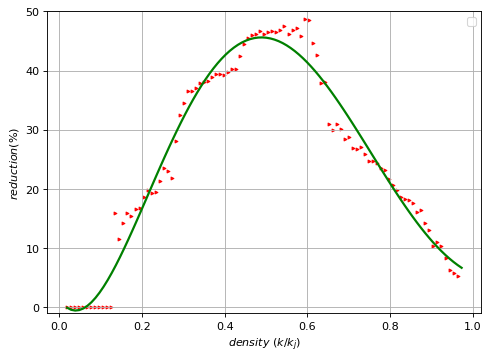

In [46]:
p1 = 0
fig = plt.figure(figsize=(7,5),num = 1,dpi = 80)
ax1 = fig.add_subplot(1,1,1)
ax1.scatter(density_non[p1:n2-n1-1], improvement2[p1:n2-n1-1],color = 'red',marker = '>',s = 6)
ax1.legend(); ax1.grid()
    
ax1.set_xlabel("$density\ (k/k_j)$")
ax1.set_ylabel("$reduction (\%) $")
#plt.xlim(0,1.05)
plt.ylim(-1,50)
    
fp4 = np.polyfit(density_non[p1:n2-n1-1], improvement2[p1:n2-n1-1], 5)
f4 = np.poly1d(fp4)
fx4 = np.linspace(density_non[p1],density_non[n2-n1-1],n2-n1-1 - p1)
ax1.plot(fx4,f4(fx4),linewidth=2,color='g') #,label = "$U'_n(t)\ Reduction$" 
ax1.legend()

# Starting flow

In [30]:
def start_point_flow(n,delta_n,D,L_int,l_n,s_0,t_sim,G,Y,R,T,delta_t,tau,v_f,a_0,b,model_id,connectivity,agg,asl_id):
    density = []; loop_flow = []; loop = []
    num_t = int(t_sim/delta_t); num_cycle = int(t_sim/(delta_t*T)); L = T*v_f*delta_t; rho = l_n + s_0; C = v_f * w * (1/rho) / (v_f + w)   
    global vehicle_state; k = 10 #gap

    for loop_start in range(int(L - D),int(L),k):
        loop.append(L - loop_start); total_fuel = 0
        vehicle_state = vehicle_update(L_int,L,L-loop_start,l_n,s_0,t_sim,T,G,Y,R,delta_t,tau,v_f,a_0,b,n,delta_n,model_id,connectivity,agg,asl_id)
        period,average = period_system(n,delta_n,L-loop_start,connectivity,G,Y,R,T,vehicle_state,model_id,num_t)#oeriod correspongding to that density
        density = (n*delta_n/(L+L_int))/(1/rho)
        system_average = sum(average[num_cycle-int(period):num_cycle,0])/period
        loop_flow.append(((n*delta_n/(L+L_int))*system_average)/C)
        print("car_number",n*delta_n,"loop =",loop[-1],"flow rate = ",loop_flow[-1],"ASL",asl_id,"connectivity =",connectivity)

    return loop,loop_flow,vehicle_state

In [31]:
def improvement_rate_flow1(D,delta_n,L_int,l_n,s_0,t_sim,G,Y,R,T,delta_t,tau,v_f,a_0,b,model_id,agg,asl_id):
    all_connected = 1; non_connected = 0; n1 = int(20/delta_n); n2 = int(30/delta_n); n3 = int(40/delta_n); n4 = int(50/delta_n); n5 = int(60/delta_n)
    improvement_rate1 = []; improvement_rate2 = []; improvement_rate3 = []; improvement_rate4 = []; improvement_rate5 = []; L = T*v_f*delta_t;
                                                                
    vehicle_state1_0 ,flow_rate1_0,density1_0,period1_0 = nfd_calc(n1,n1+1,delta_n,L_int,L,D,l_n,non_connected,G,Y,R,T,tau,delta_t,t_sim,s_0,v_f,a_0,b,model_id,agg,asl_id)
    loop1, loop_flow1, vehicle_state1 = start_point_flow(n1,delta_n,D,L_int,l_n,s_0,t_sim,G,Y,R,T,delta_t,tau,v_f,a_0,b,model_id,all_connected,agg,asl_id)

    vehicle_state2_0 ,flow_rate2_0,density2_0,period2_0 = nfd_calc(n2,n2+1,delta_n,L_int,L,D,l_n,non_connected,G,Y,R,T,tau,delta_t,t_sim,s_0,v_f,a_0,b,model_id,agg,asl_id)
    loop2, loop_flow2, vehicle_state2 = start_point_flow(n2,delta_n,D,L_int,l_n,s_0,t_sim,G,Y,R,T,delta_t,tau,v_f,a_0,b,model_id,all_connected,agg,asl_id)

    vehicle_state3_0 ,flow_rate3_0,density3_0,period3_0 = nfd_calc(n3,n3+1,delta_n,L_int,L,D,l_n,non_connected,G,Y,R,T,tau,delta_t,t_sim,s_0,v_f,a_0,b,model_id,agg,asl_id)
    loop3, loop_flow3, vehicle_state3 = start_point_flow(n3,delta_n,D,L_int,l_n,s_0,t_sim,G,Y,R,T,delta_t,tau,v_f,a_0,b,model_id,all_connected,agg,asl_id)

    vehicle_state4_0 ,flow_rate4_0,density4_0,period4_0 = nfd_calc(n4,n4+1,delta_n,L_int,L,D,l_n,non_connected,G,Y,R,T,tau,delta_t,t_sim,s_0,v_f,a_0,b,model_id,agg,asl_id)
    loop4, loop_flow4, vehicle_state4 = start_point_flow(n4,delta_n,D,L_int,l_n,s_0,t_sim,G,Y,R,T,delta_t,tau,v_f,a_0,b,model_id,all_connected,agg,asl_id)


  
    for i in range(len(loop1)):
        improvement_rate1.append(100*(loop_flow1[i]-flow_rate1_0)/flow_rate1_0)
        improvement_rate2.append(100*(loop_flow2[i]-flow_rate2_0)/flow_rate2_0)
        improvement_rate3.append(100*(loop_flow3[i]-flow_rate3_0)/flow_rate3_0)
        improvement_rate4.append(100*(loop_flow4[i]-flow_rate4_0)/flow_rate4_0)
        print("loop",loop1[i],"improvement1",improvement_rate1[i],"improvement2",improvement_rate2[i],"improvement3",improvement_rate3[i],"improvement4",improvement_rate4[i])
    return loop1,improvement_rate1,improvement_rate2,improvement_rate3,improvement_rate4

# Starting fuel

In [32]:
def start_point_fuel(n,delta_n,D,L_int,l_n,s_0,t_sim,G,Y,R,T,delta_t,tau,v_f,a_0,b,model_id,connectivity,agg,asl_id):
            
    density = []; fuel = []; loop = []
    num_t = int(t_sim/delta_t); num_cycle = int(t_sim/(delta_t*T)); L = T*v_f*delta_t; rho = l_n + s_0; C = v_f*(rho/tau)*(1/rho)/(v_f+(rho/tau)); all_connected = 1;    
    global vehicle_state; k = 10 #gap

    for loop_start in range(int(L - D),int(L),10):
        loop.append(L - loop_start); total_fuel = 0 ##L_int,L,D,l_n,s_0,t_sim,T,G,Y,R,delta_t,tau,v_f,a_0,b,n,delta_n,model_id,con,agg,asl_id
        vehicle_state = vehicle_update(L_int,L,L-loop_start,l_n,s_0,t_sim,T,G,Y,R,delta_t,tau,v_f,a_0,b,n,delta_n,model_id,connectivity,agg,asl_id)
        density,fuel_0,vehicle_state,individual_average = fuel_consumption(n,n+1,delta_n,L,L-loop_start,all_connected,G,Y,R,T,tau,t_sim,delta_t,l_n,s_0,v_f,a_0,b,model_id,agg,asl_id)#oeriod correspongding to that density
        density = (n*delta_n/(L+L_int))/(1/rho)     
        fuel.append(fuel_0[0])
        #print("car_number",n*delta_n,"loop =",loop[-1],"fuel_reduce ",fuel[-1],"connectivity =",connectivity)

    return loop,fuel,vehicle_state

In [33]:
def improvement_rate_flow(D,delta_n,L_int,l_n,s_0,t_sim,G,Y,R,T,delta_t,tau,v_f,a_0,b,model_id,agg,asl_id):
    L = v_f * T * delta_t
    all_connected = 1; non_connected = 0; n1 = int(20/delta_n); n2 = int(30/delta_n); n3 = int(40/delta_n); n4 = int(50/delta_n); n5 = int(60/delta_n); #n5 = int(65/delta_n)
    improvement_rate1 = []; improvement_rate2 = []; improvement_rate3 = []; improvement_rate4 = []; improvement_rate5 = []
                                                #n1,n2,delta_n,L,D,connectivity,G,Y,R,T,tau,t_sim,delta_t,l_n,s_0,v_f,a_0,b,model_id,agg,asl_id
    density1_0, fuel1_0, vehicle_state1_0, individual_average1_0 = fuel_consumption(n1,n1+1,delta_n,L,D,non_connected,G,Y,R,T,tau,t_sim,delta_t,l_n,s_0,v_f,a_0,b,model_id,agg,asl_id)
    loop1, fuel1, vehicle_state1 = start_point_fuel(n1,delta_n,D,L_int,l_n,s_0,t_sim,G,Y,R,T,delta_t,tau,v_f,a_0,b,model_id,all_connected,agg,asl_id)

    density2_0, fuel2_0, vehicle_state2_0, individual_average2_0 = fuel_consumption(n2,n2+1,delta_n,L,D,non_connected,G,Y,R,T,tau,t_sim,delta_t,l_n,s_0,v_f,a_0,b,model_id,agg,asl_id)
    loop2, fuel2, vehicle_state2 = start_point_fuel(n2,delta_n,D,L_int,l_n,s_0,t_sim,G,Y,R,T,delta_t,tau,v_f,a_0,b,model_id,all_connected,agg,asl_id)

    density3_0, fuel3_0, vehicle_state3_0, individual_average3_0 = fuel_consumption(n3,n3+1,delta_n,L,D,non_connected,G,Y,R,T,tau,t_sim,delta_t,l_n,s_0,v_f,a_0,b,model_id,agg,asl_id)
    loop3, fuel3, vehicle_state3 = start_point_fuel(n3,delta_n,D,L_int,l_n,s_0,t_sim,G,Y,R,T,delta_t,tau,v_f,a_0,b,model_id,all_connected,agg,asl_id)

    density4_0, fuel4_0, vehicle_state4_0, individual_average4_0 = fuel_consumption(n4,n4+1,delta_n,L,D,non_connected,G,Y,R,T,tau,t_sim,delta_t,l_n,s_0,v_f,a_0,b,model_id,agg,asl_id)
    loop4, fuel4, vehicle_state4 = start_point_fuel(n4,delta_n,D,L_int,l_n,s_0,t_sim,G,Y,R,T,delta_t,tau,v_f,a_0,b,model_id,all_connected,agg,asl_id)

  
    for i in range(len(loop1)):
        if fuel1[i] > 50: fuel1[i] = 50 #if error is too large, set 50 to be the upper boundary
        if int(fuel1_0[0]) > 50: fuel1_0[0] = 50
        if fuel2[i] > 50: fuel2[i] = 50
        if int(fuel2_0[0]) > 50: fuel2_0[0] = 50
        if fuel3[i] > 50: fuel3[i] = 50
        if int(fuel3_0[0]) > 50: fuel3_0[0] = 50
        if fuel4[i] > 50: fuel4[i] = 50 
        if int(fuel4_0[0]) > 50: fuel4_0[0] = 50
        
        improvement_rate1.append(-100*(fuel1[i]-fuel1_0[0])/fuel1_0[0])
        improvement_rate2.append(-100*(fuel2[i]-fuel2_0[0])/fuel2_0[0])
        improvement_rate3.append(-100*(fuel3[i]-fuel3_0[0])/fuel3_0[0])
        improvement_rate4.append(-100*(fuel4[i]-fuel4_0[0])/fuel4_0[0])
        print("loop",loop1[i],"improvement1",improvement_rate1[i],"improvement2",improvement_rate2[i],"improvement3",improvement_rate3[i],"improvement4",improvement_rate4[i])
    return loop1,improvement_rate1,improvement_rate2,improvement_rate3,improvement_rate4

# MPR fuel

In [34]:
def cal_fuel_MPR(cal_time,n1,n2,delta_n,D,connectivity,G,Y,R,T,tau,t_sim,delta_t,l_n,s_0,v_f,a_0,b,model_id,agg,asl_id):
#(n1,n2,loop_start,connectivity,green,cycle_length,yellow,all_red,time_gap,time_step,vehicle_length,s0,freeflow_speed,bounded_acc,bounded_dec,agg,asl_id,model_id,num_timestep):
    rho = l_n + s_0; L = v_f*T*delta_t; w = rho/(tau); num_t = int(t_sim/delta_t);
    fuel = []; density = []; p1 = 3.6 #m/s to km/h; k = 2 #gap
    for n in range(n1,n2,1):
        ave_fuel = 0
        for k in range(cal_time):
            i = 1; density.append((n*delta_n/L)/(1/rho)); final_fuel = 0; total_fuel = 0
            vehicle_state = vehicle_update(L_int,L,D,l_n,s_0,t_sim,T,G,Y,R,delta_t,tau,v_f,a_0,b,n,delta_n,model_id,connectivity,agg,asl_id)
            period,individual_average = period_individual(n,delta_n,D,connectivity,G,Y,R,T,vehicle_state,model_id,num_t) #individual period correspongding to that density            
            for t in range(int(num_t-1 - period[i] * T), num_t-1):#total fuel consumption for one vehicle
                if vehicle_state[i][t,3] >= 0:   
                    fuel_comsume_sec = math.exp( -7.73452 + 0.22946 * vehicle_state[i][t,3]*p1 - 0.00561 * (vehicle_state[i][t,3]*p1)**2 + 0.000097730 * (vehicle_state[i][t,3]*p1)**3\
                                    + 0.02799*vehicle_state[i][t,2]*p1 + 0.0068*(vehicle_state[i][t,2]*p1)*vehicle_state[i][t,3]*p1 - 0.00077221*(vehicle_state[i][t,2]*p1)*(vehicle_state[i][t,3]*p1)**2 + 0.00000838*(vehicle_state[i][t,2]*p1)*(vehicle_state[i][t+1,3]*p1)**3\
                                    - 0.0002228*(vehicle_state[i][t,2]*p1)**2 - 0.00004402*(vehicle_state[i][t,2]*p1)**2*vehicle_state[i][t,3]*p1 + 7.9*10**(-7)*(vehicle_state[i][t,2]*p1)**2*(vehicle_state[i][t+1,3]*p1)**2 + 8.17*(10)**(-7)*(vehicle_state[i][t,2]*p1)**2*(vehicle_state[i][t+1,3]*p1)**3\
                                    +1.09*(10)**(-6)*(vehicle_state[i][t,2]*p1)**3 + 4.8*(10)**(-8)*(vehicle_state[i][t,2]*p1)**3*vehicle_state[i][t,3]*p1 + 3.27*10**(-8)*(vehicle_state[i][t,2]*p1)**3*(vehicle_state[i][t,3]*p1)**2 + (-7.79)*10**(-9)*(vehicle_state[i][t,2]*p1)**3*(vehicle_state[i][t,3]*p1)**3)

                if vehicle_state[i][t,3] < 0:
                    fuel_comsume_sec = math.exp( -7.73452 - 0.01799 * vehicle_state[i][t,3]*p1 - 0.00427 * (vehicle_state[i][t,3]*p1)**2 + 0.000188290 * (vehicle_state[i][t,3]*p1)**3\
                                    +0.02804*vehicle_state[i][t,2]*p1 + 0.00772*(vehicle_state[i][t,2]*p1)*vehicle_state[i][t,3]*p1 + 0.00083744*(vehicle_state[i][t,2]*p1)*(vehicle_state[i][t,3]*p1)**2 - 0.00003387*(vehicle_state[i][t,2]*p1)*(vehicle_state[i][t,3]*p1)**3\
                                    - 0.00021988*(vehicle_state[i][t,2]*p1)**2 - 0.00005219*(vehicle_state[i][t,2]*p1)**2*vehicle_state[i][t,3]*p1 - 7.44*10**(-6)*(vehicle_state[i][t,2]*p1)**2*(vehicle_state[i][t,3]*p1)**2 + 2.77*(10)**(-7)*(vehicle_state[i][t,2]*p1)**2*(vehicle_state[i][t,3]*p1)**3\
                                    +1.08*(10)**(-6)*(vehicle_state[i][t,2]*p1)**3 + 2.47*(10)**(-7)*(vehicle_state[i][t,2]*p1)**3*vehicle_state[i][t,3]*p1 + 4.87*10**(-8)*(vehicle_state[i][t,2]*p1)**3*(vehicle_state[i][t,3]*p1)**2 + (3.79)*10**(-10)*(vehicle_state[i][t,2]*p1)**3*(vehicle_state[i][t,3]*p1)**3)
                total_fuel += delta_t * fuel_comsume_sec #Eq(36)     
            car_distance = sum(vehicle_state[i][int(num_t-1 - period[i]*T):int(num_t-1),2])*delta_t #m calculate the distance it has run
            fuel_per_m = total_fuel/car_distance;
            ave_fuel += fuel_per_m
            #print("car_number",n*delta_n,"cal",k,"density",(n*delta_n/L)/(1/rho),"final_fuel",fuel_per_m,"ASL area",D,"period",period[i],"MPR",connectivity)
        fuel.append(ave_fuel/cal_time)  #fuel consumption per meter for one car
        print("car_number",n*delta_n,"ave_fuel",fuel[-1])        
        
    return density,fuel,vehicle_state,individual_average

In [35]:
def ave_improve(cal_time,n1,n2,delta_n,D,G,Y,R,T,tau,t_sim,delta_t,l_n,s_0,v_f,a_0,b,model_id,agg,asl_id):
    improvement_rate1 = []; total_flow1 = 0
    improvement_rate2 = []; total_flow2 = 0
    improvement_rate3 = []; total_flow3 = 0
    improvement_rate4 = []; total_flow4 = 0
    improvement_rate5 = []; total_flow4 = 0 
   
    density_part2, fuel_part2, vehicle_state2,individual_average2 = cal_fuel_MPR(cal_time,n1,n2,delta_n,D,0.1,G,Y,R,T,tau,t_sim,delta_t,l_n,s_0,v_f,a_0,b,model_id,agg,asl_id)
    density_part3, fuel_part3, vehicle_state3,individual_average3 = cal_fuel_MPR(cal_time,n1,n2,delta_n,D,0.4,G,Y,R,T,tau,t_sim,delta_t,l_n,s_0,v_f,a_0,b,model_id,agg,asl_id)
    density_part4, fuel_part4, vehicle_state4,individual_average4 = cal_fuel_MPR(cal_time,n1,n2,delta_n,D,0.7,G,Y,R,T,tau,t_sim,delta_t,l_n,s_0,v_f,a_0,b,model_id,agg,asl_id)
    density_con, fuel_con, vehicle_state_con, individual_average_con = fuel_consumption(n1,n2,delta_n,L,D,1,G,Y,R,T,tau,t_sim,delta_t,l_n,s_0,v_f,a_0,b,model_id,agg,asl_id)
    density_non, fuel_non, vehicle_state_non, individual_average_non = fuel_consumption(n1,n2,delta_n,L,D,0,G,Y,R,T,tau,t_sim,delta_t,l_n,s_0,v_f,a_0,b,model_id,agg,asl_id)

    for i in range(len(density_non)):
        improvement_rate4.append(100*(fuel_non[i]-fuel_con[i])/fuel_non[i])
        improvement_rate1.append(100*(fuel_non[i]-fuel_part2[i])/fuel_non[i])
        improvement_rate2.append(100*(fuel_non[i]-fuel_part3[i])/fuel_non[i])
        improvement_rate3.append(100*(fuel_non[i]-fuel_part4[i])/fuel_non[i])
        if improvement_rate4[i]<-100: improvement_rate4[i] = 0 #if the change rate larger than 100%, regard it as invalid point
        if improvement_rate1[i]<-100: improvement_rate1[i] = 0
        if improvement_rate2[i]<-100: improvement_rate2[i] = 0
        if improvement_rate3[i]<-100: improvement_rate3[i] = 0
        print("density:",density_non[i],"improvement1:",improvement_rate1[i],"improvement2:",improvement_rate2[i],"improvement3:",improvement_rate3[i],"improvement4:",improvement_rate4[i])

    return density_non,improvement_rate1,improvement_rate2,improvement_rate3,improvement_rate4,fuel_con,fuel_non

#MPR NFD

In [36]:
# average function; under one penetration_rate, because a specific vehicle is randomly to be connected or non-connected, thus for each penetration rate, calcilate corresponding density_flowrate connection for many times and take the average
def average_den_flow(cal_time,delta_n,n1,n2,D,L_int,l_n,s_0,t_sim,G,Y,R,T,delta_t,tau,v_f,a_0,b,model_id,connectivity,agg,asl_id):
    flowrate_ave = []; density = []; num_t = int(t_sim/delta_t); num_cycle = int(t_sim/(delta_t*T)) ; L = T*v_f*delta_t; rho = l_n + s_0; C = 0.3900092769755578
    global total_flowrate,vehicle_state
    for n in range(n1,n2):
        density.append((n*delta_n/(L+L_int))/(1/rho))# specific density for a specific vehicle number
        total_flowrate = 0; flowrate = np.zeros([cal_time,1])
        for i in range(cal_time):
            average_speed = []#average speed for a individual vehicle
            vehicle_state,veh_t1,ttc1 = vehicle_update(L_int,D,l_n,s_0,t_sim,T,G,Y,R,delta_t,tau,v_f,a_0,b,n,delta_n,model_id,connectivity,agg,asl_id)
            period,average = period_system(n,delta_n,D,connectivity,G,Y,R,T,vehicle_state,model_id,num_t)#oeriod correspongding to that density
            system_average = sum(average[num_cycle-period:num_cycle,0])/period
            flowrate[i] = ((n*delta_n/(L+L_int) * system_average)/C)
            print("car_number",n*delta_n,"density",density[-1],"flowrate",flowrate[i],"cal_time",i,"connectivity",connectivity)
        flowrate_ave.append(sum(flowrate[0:len(flowrate),0])/cal_time) # calculate the average flowrate for a specific density
        print("MPR",connectivity,"average density",density[-1],"average flowrate",flowrate_ave[-1])

    return vehicle_state,flowrate_ave,density,period,veh_t1

# Examples try
|Parameter   | Value   | Parameter | Value |
| :------:| :------: | :------: | :------: |
| $B$ | $60s$ | $G$ | $24s$ |
| $Y$ | $6s$ | $R$ | $30s$ |
| $t_{RE}$ | $1.5s$ | $\tau$ | $1.5s$  |
| $L$ | $720m$ | $D$ | $300m$ |
| $s_0$ | $2m$ | $l_n$ | $5m$ |
| $\zeta$ | $7m$ |  |  |
| $v_f$ | $12m/s$ | $a_0$ | $1.5m/s^2$ |
|  $b$ | $3m/s^2$ | $\epsilon$ | $10^{-5}$ |

In [37]:
def IDM_example(tau,delta_t,l_n,s_0,v_f,a_0,b):
    #network fundamental diagram
    t_sim = 7200; num_t = int(t_sim/delta_t)
    R = int(0/delta_t); G = int(60/delta_t); Y = int(0/delta_t); T = G + Y + R
    rho = l_n + s_0; L = T * v_f * delta_t; D = 300; w = rho/tau #m
    delta_n = 1
    n1 = int(2/delta_n); n2 = int(101/delta_n)
    non_connected = 0; all_connected = 1; aggressive = 1; ASL = 0; ex_ASL = 1; model_id = 3
    # plot the figure
    fig = plt.figure(figsize=(14,4),num = 1,dpi = 80)
    p = n2; p1 = 1; p2 = 98; start = datetime.datetime.now()
    
    #vehicle_banewell_free,flow_banewell_free,density_banewell_free,period_banewell_free,vehicle_banewell_free1,time_free1 = nfd_calc(n1,n2,delta_n,L_int,D,l_n,non_connected,G,Y,R,T,tau,delta_t,3600,s_0,v_f,a_0,b,3,1,ASL)    
    #BA newell car-following model
    R = int(30/delta_t); G = int(24/delta_t); Y = int(6/delta_t); T = G + Y + R  
    '''
     #n1,n2,loop_start,connectivity,green,cycle_length,yellow,all_red,time_gap,time_step,vehicle_length,s0,freeflow_speed,bounded_acc,bounded_dec,asl_id,model_id,num_timestep
    vehicle_banewell_all,flow_banewell_all,density_banewell_all,period_banewell_all,vehicle_banewell_all1,time_all1 = nfd_calc(n1,n2,delta_n,L_int,D,l_n,non_connected,G,Y,R,T,tau,delta_t,t_sim,s_0,v_f,a_0,b,3,aggressive,ASL)
    vehicle_banewell_dy,flow_banewell_dy,density_banewell_dy,period_banewell_dy,vehicle_banewell_dy1,time_dy1 = nfd_calc(n1,n2,delta_n,L_int,D,l_n,all_connected,G,Y,R,T,tau,delta_t,t_sim,s_0,v_f,a_0,b,3,aggressive,ex_ASL)
    vehicle_banewell_non,flow_banewell_non,density_banewell_non,period_banewell_non,vehicle_banewell_non1,time_non1 = nfd_calc(n1,n2,delta_n,L_int,D,l_n,non_connected,G,Y,R,T,tau,delta_t,t_sim,s_0,v_f,a_0,b,3,aggressive,ex_ASL)
    
    ax1 = fig.add_subplot(1,2,1)
    ax1.grid()
    ax1.set_xlabel("$density \ (k/k_j)$")
    ax1.set_ylabel("$flowrate \ (q/C)$")
    #plt.ylim(0.01,0.64)
    ax1.scatter(density_banewell_free,flow_banewell_free,marker = '>',color = 'b',s = 5,label="$no\ signal$")
    ax1.scatter(density_banewell_non,flow_banewell_non,marker = 'D',color = 'green',s = 5,label="$no\ ASL$")
    ax1.scatter(density_banewell_all,flow_banewell_all,marker = 'o',color = 'm',s = 5,label="$U_n(t)$")
    ax1.scatter(density_banewell_dy,flow_banewell_dy,marker = 'v',color = 'k',s = 5,label="$U'_n(t)$")
    ax1.legend()
    '''                                        
    density_non,improvement1,improvement2,fuel_con,fuel_dy,fuel_non = improvement_rate(n1,n2,delta_n,D,G,Y,R,T,tau,t_sim,delta_t,l_n,s_0,v_f,a_0,b,model_id,aggressive,ex_ASL)
    ax1 = fig.add_subplot(1,2,1)
    ax1.scatter(density_non[p1:n2-n1-1], improvement1[p1:n2-n1-1],color = 'b',marker = '>',s = 6,label = "$U_n(t)$")
    ax1.scatter(density_non[p1:n2-n1-1], improvement2[p1:n2-n1-1],color = 'red',marker = '>',s = 6,label = "$U'_n(t)$")
    ax1.legend(); ax1.grid()
    
    ax2 = fig.add_subplot(1,2,2)
    ax2.set_xlabel("$density\ (k/k_j)$")
    ax2.set_ylabel("$reduction (\%) $")
    ax2.grid()
    plt.xlim(0,1.05)
    plt.ylim(0,10)
    fp3 = np.polyfit(density_non[p1:n2-n1-1], improvement1[p1:n2-n1-1], 2)
    f3 = np.poly1d(fp3)
    fx3 = np.linspace(density_non[p1],density_non[n2-n1-1],n2-n1-1 - p1)
    ax2.plot(fx3,f3(fx3),linewidth=2,color='b',label = "$U_n(t)\ Reduction$")
    
    fp4 = np.polyfit(density_non[p1:n2-n1-1], improvement2[p1:n2-n1-1], 2)
    f4 = np.poly1d(fp4)
    fx4 = np.linspace(density_non[p1],density_non[n2-n1-1],n2-n1-1 - p1)
    ax2.plot(fx4,f4(fx4),linewidth=2,color='g',label = "$U'_n(t)\ Reduction$")
    ax2.legend()
    
    end = datetime.datetime.now()
    print("time",end-start)

In [38]:
def MPR_example(tau,delta_t,l_n,s_0,v_f,a_0,b):
    #network fundamental diagram
    t_sim = 3600; num_t = int(t_sim/delta_t)
    R = int(30/delta_t); G = int(24/delta_t); Y = int(6/delta_t); T = G + Y + R 
    rho = l_n + s_0; L = T * v_f * delta_t; D = 300; w = rho/tau #m
    delta_n = 1
    n1 = int(2/delta_n); n2 = int(101/delta_n)
    non_connected = 0; all_connected = 1; aggressive = 1;ASL=0; ex_ASL = 1; p1 = 10; p2 = 68 
    # plot the figure
    fig = plt.figure(figsize=(14,4),num = 1,dpi = 80); start = datetime.datetime.now()  #n1,n2,delta_n,L_int,L,D,l_n,connectivity,G,Y,R,T,tau,delta_t,t_sim,s_0,v_f,a_0,b,model_id,agg,asl_id
    #BA newell car-following model                                 
    vehicle_newell_dy,flow_newell_dy,density_newell_dy,period_newell_dy = nfd_calc(n1,n2,delta_n,L_int,L,D,l_n,all_connected,G,Y,R,T,tau,delta_t,t_sim,s_0,v_f,a_0,b,3,aggressive,ex_ASL)
    vehicle_banewell_10,flow_banewell_10,density_banewell_10,period_banewell_10 = average_den_flow(5,delta_n,n1,n2,D,L_int,l_n,s_0,t_sim,G,Y,R,T,delta_t,tau,v_f,a_0,b,3,0.1,aggressive,ex_ASL)
    vehicle_banewell_50,flow_banewell_50,density_banewell_50,period_banewell_50 = average_den_flow(5,delta_n,n1,n2,D,L_int,l_n,s_0,t_sim,G,Y,R,T,delta_t,tau,v_f,a_0,b,3,0.5,aggressive,ex_ASL)
    vehicle_banewell_70,flow_banewell_70,density_banewell_70,period_banewell_70 = average_den_flow(5,delta_n,n1,n2,D,L_int,l_n,s_0,t_sim,G,Y,R,T,delta_t,tau,v_f,a_0,b,3,0.7,aggressive,ex_ASL)

    vehicle_newell_non,flow_newell_non,density_newell_non,period_newell_non = nfd_calc(n1,n2,delta_n,L_int,L,D,l_n,non_connected,G,Y,R,T,tau,delta_t,t_sim,s_0,v_f,a_0,b,3,aggressive,ex_ASL)
    

    ax1 = fig.add_subplot(1,2,1)
    ax1.grid()
    ax1.set_xlabel("$Density \ (k/k_j)$")
    ax1.set_ylabel("$Flow\ rate \ (q/C)$")
    #plt.ylim(0.01,0.64)
    ax1.scatter(density_newell_non,flow_newell_non,marker = '>',color = 'red',s = 12,label="$0MPR$")
    ax1.scatter(density_banewell_10,flow_banewell_10,marker = 'v',color = 'b',s = 12,label="$0.1MPR$")
    ax1.scatter(density_banewell_50,flow_banewell_50,marker = '<',color = 'm',s = 12,label="$0.5MPR$")
    ax1.scatter(density_banewell_70,flow_banewell_70,marker = '+',color = 'brown',s = 18,label="$0.7MPR$")
    ax1.scatter(density_newell_dy,flow_newell_dy,marker = 'D',color = 'c',s = 12,label="$1MPR$")
    ax1.legend()

    ax2 = fig.add_subplot(1,2,2)
    ax2.grid()
    ax2.set_xlabel("$Density \ (k/k_j)$")
    ax2.set_ylabel("$Flowrate \ (q/C)$")
    #plt.ylim(0.01,0.64)
    ax2.scatter(density_newell_non[p1:p2],flow_newell_non[p1:p2],marker = '>',color = 'red',s = 12,label="$0MPR$")
    ax2.scatter(density_banewell_10[p1:p2],flow_banewell_10[p1:p2],marker = 'v',color = 'b',s = 12,label="$0.1MPR$")
    ax2.scatter(density_banewell_50[p1:p2],flow_banewell_50[p1:p2],marker = '<',color = 'm',s = 12,label="$0.5MPR$")
    ax2.scatter(density_banewell_70[p1:p2],flow_banewell_70[p1:p2],marker = '+',color = 'brown',s = 18,label="$0.7MPR$")
    ax2.scatter(density_newell_dy[p1:p2],flow_newell_dy[p1:p2],marker = 'D',color = 'c',s = 12,label="$1MPR$")
    ax2.legend()
    end = datetime.datetime.now()
    print("time",end-start)

In [39]:
def starting_example(tau,delta_t,l_n,s_0,v_f,a_0,b): # how flow will change according to different starting points
    #network fundamental diagram
    t_sim = 7200; num_t = int(t_sim/delta_t)
    R = int(30/delta_t); G = int(24/delta_t); Y = int(6/delta_t); T = G + Y + R 
    rho = l_n + s_0; L = T * v_f * delta_t; D = 300; w = rho/tau #m
    delta_n = 1
    n1 = int(2/delta_n); n2 = int(101/delta_n)
    non_connected = 0; all_connected = 1; aggressive = 1; ASL = 0; ex_ASL = 1; start = datetime.datetime.now()  
    # plot the figure
    fig = plt.figure(figsize=(7,4),num = 1,dpi = 80)
    loop,improvement_rate1,improvement_rate2,improvement_rate3,improvement_rate4 = improvement_rate_flow1(D,delta_n,L_int,l_n,s_0,t_sim,G,Y,R,T,delta_t,tau,v_f,a_0,b,3,aggressive,ex_ASL)

    ax1 = fig.add_subplot(1,1,1)
    ax1.set_xlabel("$Implementation \ area\ (m)$")
    ax1.set_ylabel("$Improvement \ (\%)$")
    #plt.ylim(-0.5,40)
    ax1.scatter(loop, improvement_rate1,color = 'r',marker = 'o',s=15,label = "$Vehicle\ number=20$")
    ax1.scatter(loop, improvement_rate2,color = 'g',marker = 'v',s=15,label = "$Vehicle\ number=30$")
    ax1.scatter(loop, improvement_rate3,color = 'b',marker = 's',s=15,label = "$Vehicle\ number=40$")
    ax1.scatter(loop, improvement_rate4,color = 'brown',marker = 'x',s=15,label = "$Vehicle\ number=50$")
    ax1.legend(loc = 'lower right')
    ax1.grid()
    end = datetime.datetime.now()
    print("time",end-start)

In [40]:
def fuel_example(tau,delta_t,l_n,s_0,v_f,a_0,b):
    t_sim = 7200; num_t = int(t_sim/delta_t)
    R = int(30/delta_t); G = int(24/delta_t); Y = int(6/delta_t); T = G + Y + R 
    rho = l_n + s_0; L = T * v_f * delta_t; D = 300; w = rho/tau #m
    delta_n = 1
    n1 = 2; n2 = 101
    non_connected = 0; all_connected = 1; cal_time = 10; ASL = 0; ex_ASL = 1; aggressive = 1
    # plot the figure
    fig = plt.figure(figsize=(14,4),num = 1,dpi = 80)
    start = datetime.datetime.now()

    density_non,improvement_rate1,improvement_rate2,improvement_rate3,improvement_rate4,fuel_con,fuel_non = ave_improve(cal_time,n1,n2,delta_n,D,G,Y,R,T,tau,t_sim,delta_t,l_n,s_0,v_f,a_0,b,3,aggressive,ex_ASL)

    ax1 = fig.add_subplot(1,2,1)
    ax1.set_xlabel("$Density\ (k/k_j)$")
    ax1.set_ylabel("$Reduction (\%)$")
    ax1.grid()
    plt.xlim(0,1)
    plt.ylim(0,50)

    ax2 = fig.add_subplot(1,2,2)
    ax2.set_xlabel("$Density\ (k/k_j)$")
    ax2.set_ylabel("$Reduction (\%)$")
    ax2.grid()
    plt.xlim(0,1)
    plt.ylim(0,50)
    p1 = 0; p2 = n2-n1-1;

    ax1.scatter(density_non[p1:p2],improvement_rate1[p1:p2],color = 'b',marker = '>',s = 6,label = "$0.1MPR$")#linewidth=0.5,
    fp1 = np.polyfit(density_non[p1:p2], improvement_rate1[p1:p2],5)
    f1 = np.poly1d(fp1)
    fx1 = np.linspace(density_non[p1],density_non[p2],p2-p1)
    ax2.plot(fx1,f1(fx1),linewidth=2,color='b',linestyle='--',label = "$0.1MPR$")

    ax1.scatter(density_non,improvement_rate2,color = 'm',marker = 'D',s = 6,label = "$0.5MPR$")#linewidth=0.5,
    fp2 = np.polyfit(density_non[p1:p2], improvement_rate2[p1:p2],5)
    f2 = np.poly1d(fp2)
    fx2 = np.linspace(density_non[p1],density_non[p2],p2-p1)
    ax2.plot(fx2,f2(fx2),linewidth=2,color='m',linestyle=':',label = "$0.5MPR$")

    ax1.scatter(density_non,improvement_rate3,color = 'brown',marker = 'v',s = 6,label = "$0.7MPR$")#linewidth=0.5,
    fp3 = np.polyfit(density_non[p1:p2], improvement_rate3[p1:p2], 5)
    f3 = np.poly1d(fp3)
    fx3 = np.linspace(density_non[p1],density_non[p2],p2-p1)
    ax2.plot(fx3,f3(fx3),linewidth=2,color='brown',linestyle='-.',label = "$0.7MPR$")

    ax1.scatter(density_non[p1:p2],improvement_rate4[p1:p2],color = 'black',marker = '*',s = 6,label = "$1MPR$")#linewidth=0.5,1MPR
    fp4 = np.polyfit(density_non[p1:p2], improvement_rate4[p1:p2],5)
    f4 = np.poly1d(fp4)
    fx4 = np.linspace(density_non[p1],density_non[p2],p2-p1)
    ax2.plot(fx4,f4(fx4),linewidth=2,color='c',linestyle=':',label = "$1MPR$")

    ax1.legend()
    ax2.legend()
    end = datetime.datetime.now()
    print("time",end-start)

In [41]:
def starting_fuel(tau,delta_t,l_n,s_0,v_f,a_0,b): # how fuel consumption will change according to different starting points
    t_sim = 7200; num_t = int(t_sim/delta_t)
    R = int(30/delta_t); G = int(24/delta_t); Y = int(6/delta_t); T = G + Y + R 
    rho = l_n + s_0; L = T * v_f * delta_t; D = 300; w = rho/tau #m
    delta_n = 1
    non_connected = 0; all_connected = 1; ASL = 0; ex_ASL = 1; aggressive = 1
    # plot the figure
    fig = plt.figure(figsize=(7,4),num = 1,dpi = 80)
    start = datetime.datetime.now()

    start = datetime.datetime.now()                                              
    loop,improvement_rate1,improvement_rate2,improvement_rate3,improvement_rate4 = improvement_rate_flow(D,delta_n,L_int,l_n,s_0,t_sim,G,Y,R,T,delta_t,tau,v_f,a_0,b,3,aggressive,ex_ASL)
    end = datetime.datetime.now()
    print("time",end-start)

    fig = plt.figure(figsize=(7,4),num = 1,dpi = 80)
    
    ax1 = fig.add_subplot(1,1,1)
    ax1.set_xlabel("$Implementation \ area\ (m)$")
    ax1.set_ylabel("$Reduction \ (\%)$")
    plt.ylim(-0.1,50)
    ax1.scatter(loop, improvement_rate1,color = 'r',marker = 'o',s=15,label = "$Vehicle\ number=20$"),
    ax1.scatter(loop, improvement_rate2,color = 'g',marker = 'v',s=15,label = "$Vehicle\ number=30$")
    ax1.scatter(loop, improvement_rate3,color = 'b',marker = 's',s=15,label = "$Vehicle\ number=40$")
    ax1.scatter(loop, improvement_rate4,color = 'brown',marker = 'x',s=15,label = "$Vehicle\ number=50$")
    ax1.legend(loc = 'lower right')
    ax1.grid()
    end = datetime.datetime.now()
    print("time",end-start)

In [42]:
def model_plot(model_id):
    if model_id == 1:
        model = widgets.interact(IDM_example,
            tau = widgets.FloatSlider(min=0.5,max=3,step=0.5,value = 1.5,description=r"$\tau$"),
            delta_t = widgets.FloatSlider(min=0.1,max=2,step=0.1,value = 1.5,description=r"$\Delta t$"),
            l_n = widgets.FloatSlider(min=3,max=8,step=1,value = 5,description="$l$"),
            s_0 = widgets.FloatSlider(min=0,max=4,step=1,value = 2,description="$S_0$"),
            v_f = widgets.FloatSlider(min=10,max=20,step=1,value = 12,description="$v_f$"),
            a_0 = widgets.FloatSlider(min=0,max=4,step=1,value = 1.5,description="$a_0$"),
            b = widgets.FloatSlider(min=0,max=6,step=1,value = 3,description="$b$"),)
    elif model_id == 2:
            model = widgets.interact(MPR_example,
            tau = widgets.FloatSlider(min=0.5,max=3,step=0.5,value = 1.5,description=r"$\tau$"),
            delta_t = widgets.FloatSlider(min=0.1,max=2,step=0.1,value = 1.5,description=r"$\Delta t$"),
            l_n = widgets.FloatSlider(min=3,max=8,step=1,value = 5,description="$l$"),
            s_0 = widgets.FloatSlider(min=0,max=4,step=1,value = 2,description="$S_0$"),
            v_f = widgets.FloatSlider(min=10,max=20,step=1,value = 12,description="$v_f$"),
            a_0 = widgets.FloatSlider(min=0,max=4,step=1,value = 1.5,description="$a_0$"),
            b = widgets.FloatSlider(min=0,max=6,step=1,value = 3,description="$b$"),)
    elif model_id == 3:
            model = widgets.interact(starting_example,
            tau = widgets.FloatSlider(min=0.5,max=3,step=0.5,value = 1.5,description=r"$\tau$"),
            delta_t = widgets.FloatSlider(min=0.1,max=2,step=0.1,value = 1.5,description=r"$\Delta t$"),
            l_n = widgets.FloatSlider(min=3,max=8,step=1,value = 5,description="$l$"),
            s_0 = widgets.FloatSlider(min=0,max=4,step=1,value = 2,description="$S_0$"),
            v_f = widgets.FloatSlider(min=10,max=20,step=1,value = 12,description="$v_f$"),
            a_0 = widgets.FloatSlider(min=0,max=4,step=1,value = 1.5,description="$a_0$"),
            b = widgets.FloatSlider(min=0,max=6,step=1,value = 3,description="$b$"),)
    elif model_id == 4:
            model = widgets.interact(fuel_example,
            tau = widgets.FloatSlider(min=0.5,max=3,step=0.5,value = 1.5,description=r"$\tau$"),
            delta_t = widgets.FloatSlider(min=0.1,max=2,step=0.1,value = 1.5,description=r"$\Delta t$"),
            l_n = widgets.FloatSlider(min=3,max=8,step=1,value = 5,description="$l$"),
            s_0 = widgets.FloatSlider(min=0,max=4,step=1,value = 2,description="$S_0$"),
            v_f = widgets.FloatSlider(min=10,max=20,step=1,value = 12,description="$v_f$"),
            a_0 = widgets.FloatSlider(min=0,max=4,step=1,value = 1.5,description="$a_0$"),
            b = widgets.FloatSlider(min=0,max=6,step=1,value = 3,description="$b$"),)
    elif model_id == 5:
            model = widgets.interact(starting_fuel,
            tau = widgets.FloatSlider(min=0.5,max=3,step=0.5,value = 1.5,description=r"$\tau$"),
            delta_t = widgets.FloatSlider(min=0.1,max=2,step=0.1,value =1.5,description=r"$\Delta t$"),
            l_n = widgets.FloatSlider(min=3,max=8,step=1,value = 5,description="$l$"),
            s_0 = widgets.FloatSlider(min=0,max=4,step=1,value = 2,description="$S_0$"),
            v_f = widgets.FloatSlider(min=10,max=20,step=1,value = 12,description="$v_f$"),
            a_0 = widgets.FloatSlider(min=0,max=4,step=1,value = 1.5,description="$a_0$"),
            b = widgets.FloatSlider(min=0,max=6,step=1,value = 3,description="$b$"),)
    return model

interactive(children=(FloatSlider(value=1.5, description='$\\tau$', max=3.0, min=0.5, step=0.5), FloatSlider(v…

car_number 2 ave_fuel 8.799950111340409e-05
car_number 3 ave_fuel 8.799950111340409e-05
car_number 4 ave_fuel 8.799950111340409e-05


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:27: RuntimeWarning: invalid value encountered in double_scalars


car_number 5 ave_fuel 8.799950111340409e-05
car_number 6 ave_fuel 8.799950111340409e-05
car_number 7 ave_fuel 8.799950111340409e-05
car_number 8 ave_fuel 8.799950111340409e-05
car_number 9 ave_fuel 8.799950111340409e-05
car_number 10 ave_fuel 8.799950111340409e-05
car_number 11 ave_fuel 8.799950111340409e-05
car_number 12 ave_fuel 8.799950111340409e-05
car_number 13 ave_fuel 8.799950111340409e-05
car_number 14 ave_fuel 9.132377054797279e-05
car_number 15 ave_fuel 0.0001142209346086203
car_number 16 ave_fuel 0.00011987244811327922
car_number 17 ave_fuel 0.00012902516241664419
car_number 18 ave_fuel 0.0001279958229523396
car_number 19 ave_fuel 0.0001389288830573346
car_number 20 ave_fuel 0.0001393854881633656
car_number 21 ave_fuel 0.00014215512854169363
car_number 22 ave_fuel 0.0001539154371700715
car_number 23 ave_fuel 0.00014477125990147
car_number 24 ave_fuel 0.0001534711493182126
car_number 25 ave_fuel 0.00016184579204384808
car_number 26 ave_fuel 0.0001668517669911335
car_number 27

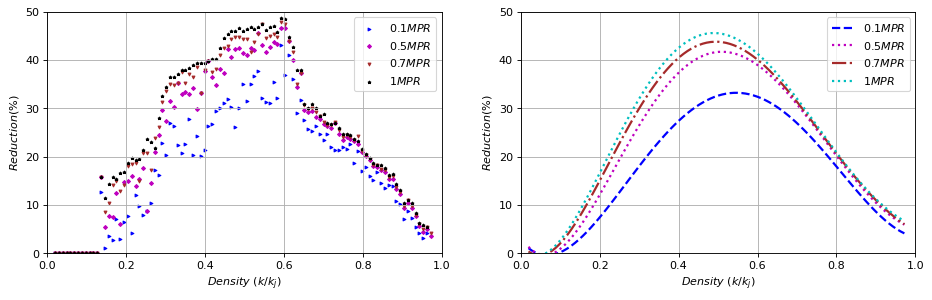

<function __main__.fuel_example>

<function __main__.model_plot>

In [43]:
widgets.interact(model_plot,
            model_id = widgets.FloatSlider(min=1,max=6,step=1,value = 4,description="model id"))

#end